---
####                   “ PERCEPTRÓN MONOCAPA”
---

```
Asignatura :    MINERÍA DE DATOS
Docente    :    Prof. CARLOS FERNANDO MONTOYA CUBAS
Estudiante:	                                                         		       
- CHOQUE SARMIENTO LEIDY DIANA
- ESCOBEDO MESCCO ANGIE
- ROJAS CAHUANA ETSON RONALDAO		
- TTITO QUILCA CESAR RODRIGO
- TTITO SAYA ALEXANDER
```

## **PERCEPTRON MONOCAPA**
#### **Historia:**

*En 1957, Frank Rosenblatt puso nombre a lo que, en Machine Learning, podríamos llamar una neurona artificial. La llamó Perceptrón. Basándose en el modelo MCP, desarrolló un algoritmo matemático que, simulando el comportamiento de las neuronas, tiene la habilidad de aprender. Lo que consigue aprender dicho algoritmo son los pesos adecuados para que la salida sea la correcta. Y como al final está decidiendo entre dos valores, podemos decir que el perceptrón está clasificando en dos clases los datos*


#### **¿Como Funciona?**

*Al perceptrón se le pasa un conjunto de datos de entrenamiento. La regla de aprendizaje del perceptrón consiste en ir añadiendo un incremento a los pesos de las entradas hasta que las salidas obtenidas por el perceptrón coincidan con las salidas esperadas del conjunto de datos de entrenamiento. **Prueba y error**.*

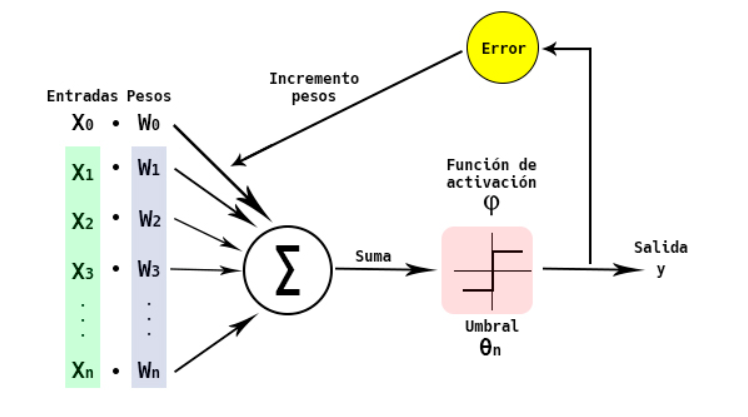


#### **Para que el Algoritmo funcione se deben cumplir:**
1.- *El conjunto de datos tiene que ser linealmente separable.*

2.- *La tasa de aprendizaje tiene que ser suficientemente pequeña.*

*Si no se cumplen las dos condiciones anteriores, nuestro perceptrón seguirá intentando calcular los pesos correctos hasta el infinito, y más allá.*

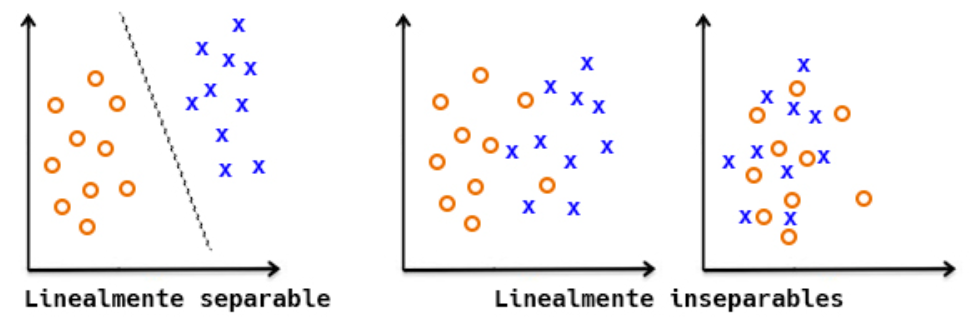

### **ALGORITMO DE ENTRENAMIENTO**
1. *Inicializar los pesos (W) y el umbral () en valores pequeños aleatorios*
2. *Leer un par de entrenamientos X = {X1, X2, X3, X4, X5} y las  salida deseadas D = {d1}*
3. Calcular el producto punto
$$XW = x1 * w1 + x2 * w2 + ... + xn * wn-\theta$$ 
4. Aplicar la función de activación ‘escalón unitario’
5. Modificar los pesos $$ Wk = Wk + Coef. Aprendizaje * D - Y *x_k  , tupla $$ $$ xk $$
6. Regresar al paso 2 y repetir el proceso hasta tener un valor aceptable de error.

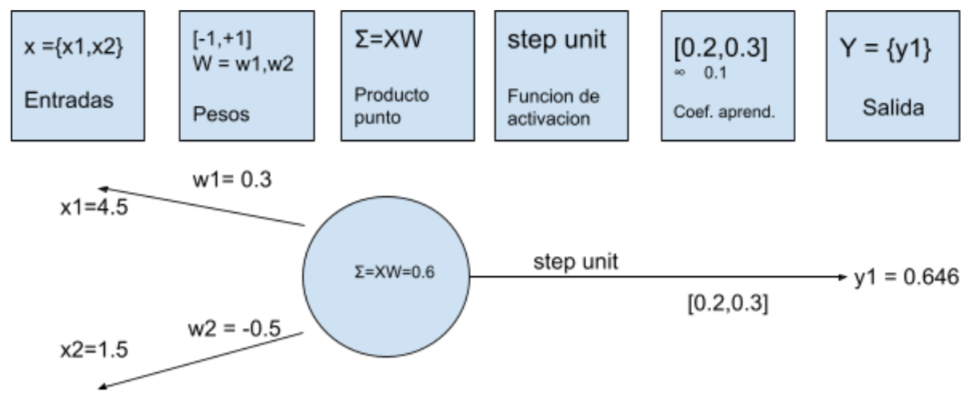


### **Instalamos Pyspark**

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9

     |████████████████████████████████| 204.2 MB 34 kB/s 
     |████████████████████████████████| 198 kB 35.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=7c13c027450f8c9f13d7928ab590483c1ce242535ad77f4f12a25b620d155037
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


### **Importamos las librerias necesarias**

In [ ]:
import IPython
from pyspark import SparkConf 
from pyspark.context import SparkContext 
from pyspark.sql import SparkSession
import random
import numpy as np
import math
from pyspark.ml.linalg import DenseVector
from math import e
from pyspark.ml.feature import StringIndexer, IndexToString
from pyspark.ml.feature import VectorAssembler, VectorIndexer

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.master("local[*]").getOrCreate()

print("pyspark version:" + str(sc.version))
print("Ipython version:" + str(IPython.__version__))

pyspark version:3.0.1
Ipython version:5.5.0


### **Leemos el Data Set**

In [ ]:
from pyspark.ml.linalg import DenseVector
from math import e
import numpy as np
from pyspark.ml.feature import StringIndexer, IndexToString
from pyspark.mllib.stat import Statistics
from pyspark.ml.feature import VectorAssembler, VectorIndexer
import random
import math
import seaborn as sns
import pandas as pd

In [ ]:
Iris_data = spark.read.csv("Iris_2_clases.csv", header=True, inferSchema=True)

Iris_data.show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-

In [ ]:
indexer = StringIndexer(inputCol="Species", outputCol="label").fit(Iris_data)
Iris_data = indexer.transform(Iris_data)
Iris_data.show()

+---+-------------+------------+-------------+------------+-----------+-----+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|label|
+---+-------------+------------+-------------+------------+-----------+-----+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|  0.0|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|  0.0|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|  0.0|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|  0.0|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|  0.0|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|  0.0|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|  0.0|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|  0.0|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|  0.0|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-

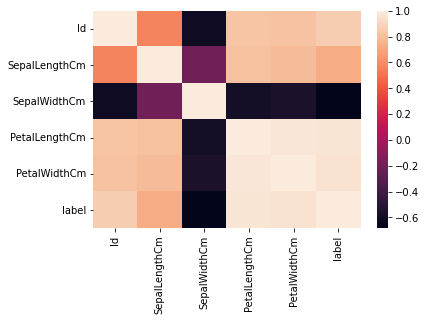

In [ ]:
numeric_features = [t[0] for t in Iris_data.dtypes if t[1] !='string']
numeric_features_df = Iris_data.select(numeric_features)
numeric_features_df.toPandas().head()
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])
#Matriz de correlacion con coeficiente de pearson
#Para poder hacer comparaciones se estandariza la covarianza, generando
corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
#Mostrar mapa de calor que es una técnica de visualización de datos
sns.heatmap(corr_df);

In [ ]:
#Mostrar el dataframe con las etiquetas numericas
Iris_data2 = Iris_data.rdd.map(lambda x: tuple(x))

#Generar la tupla de etiqueta(Key) y caracteristicas de data(features)
#Iris_data2 = Iris_data2.map(lambda x: (x[6], list( set( (x[1], x[2], x[3], x[4]) ) ) ))
Iris_data2 = Iris_data2.map(lambda x: (x[6],  (x[1], x[2], x[3], x[4]) ))
Iris_data2.collect()

[(0.0, (5.1, 3.5, 1.4, 0.2)),
 (0.0, (4.9, 3.0, 1.4, 0.2)),
 (0.0, (4.7, 3.2, 1.3, 0.2)),
 (0.0, (4.6, 3.1, 1.5, 0.2)),
 (0.0, (5.0, 3.6, 1.4, 0.2)),
 (0.0, (5.4, 3.9, 1.7, 0.4)),
 (0.0, (4.6, 3.4, 1.4, 0.3)),
 (0.0, (5.0, 3.4, 1.5, 0.2)),
 (0.0, (4.4, 2.9, 1.4, 0.2)),
 (0.0, (4.9, 3.1, 1.5, 0.1)),
 (0.0, (5.4, 3.7, 1.5, 0.2)),
 (0.0, (4.8, 3.4, 1.6, 0.2)),
 (0.0, (4.8, 3.0, 1.4, 0.1)),
 (0.0, (4.3, 3.0, 1.1, 0.1)),
 (0.0, (5.8, 4.0, 1.2, 0.2)),
 (0.0, (5.7, 4.4, 1.5, 0.4)),
 (0.0, (5.4, 3.9, 1.3, 0.4)),
 (0.0, (5.1, 3.5, 1.4, 0.3)),
 (0.0, (5.7, 3.8, 1.7, 0.3)),
 (0.0, (5.1, 3.8, 1.5, 0.3)),
 (0.0, (5.4, 3.4, 1.7, 0.2)),
 (0.0, (5.1, 3.7, 1.5, 0.4)),
 (0.0, (4.6, 3.6, 1.0, 0.2)),
 (0.0, (5.1, 3.3, 1.7, 0.5)),
 (0.0, (4.8, 3.4, 1.9, 0.2)),
 (0.0, (5.0, 3.0, 1.6, 0.2)),
 (0.0, (5.0, 3.4, 1.6, 0.4)),
 (0.0, (5.2, 3.5, 1.5, 0.2)),
 (0.0, (5.2, 3.4, 1.4, 0.2)),
 (0.0, (4.7, 3.2, 1.6, 0.2)),
 (0.0, (4.8, 3.1, 1.6, 0.2)),
 (0.0, (5.4, 3.4, 1.5, 0.4)),
 (0.0, (5.2, 4.1, 1.5, 0.1)),
 (0.0, (5.

### **Separar datos para entrenamiento y test**

In [ ]:
train_sample = 0.60
test_sample = 0.40

(train, test) = Iris_data2.randomSplit([train_sample, test_sample], 1234)

### **La función de escalón unitario**
*A continuación, definimos una función de activación g(z) que toma como entrada una combinación lineal de los valores de entrada x y los pesos w (z=w1x1+⋯+wmxm), y si g(z) es mayor que un umbral definido θ predecimos 1 y -1 en caso contrario*

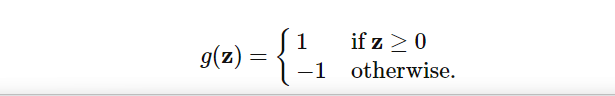

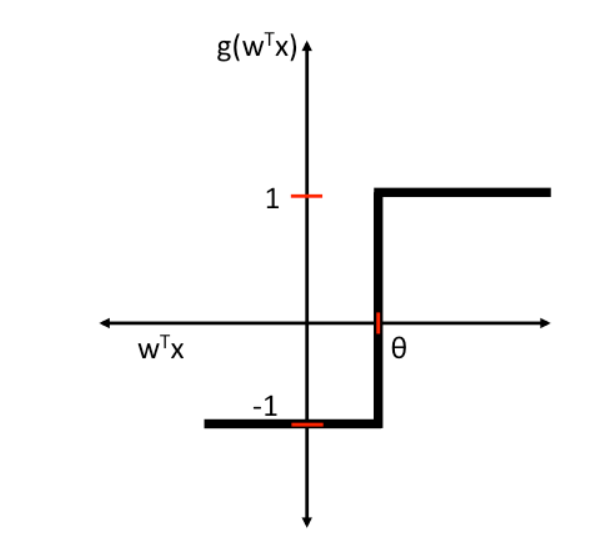


### **Clase Perceptron**


In [ ]:
class perceptron:
  def __init__(self):
    self.weights = list(np.random.rand(4))
    self.kernel = 'step'

  def change_weights(self, nuevos_pesos):
    self.weights=nuevos_pesos

  def predecir_manual(self,vector):
    RDD = sc.parallelize([vector,self.weights]) 
    dot = RDD.reduce(lambda x,y: np.array(x).dot(np.array(y)))
    return self.predict(dot,self.kernel)

  def progress_bar(current_value, total):
      increments = 50
      percentual = ((current_value/ total) * 100)
      i = int(percentual // (100 / increments ))
      text = "\r[{0: <{1}}] {2}%".format('=' * i, increments, percentual)
      print(text, end="\n" if percentual == 100 else "")

  def new_weights(self,tupla,learning_rate, error):
    for n in range(0, len(self.weights)):
      self.weights[n] = round(self.weights[n],7)+learning_rate*error*tupla[1][n]

  def potencia(numero, exponente):
      contador = 1  # Simple ayudante del ciclo
      elevado = 1  # Aquí almacenamos el resultado de ir multiplicando el número
      # Hacer un ciclo desde 1 hasta el exponente, para multiplicarlo ese número de veces
      while contador <= exponente:
          elevado = elevado * numero
          contador = contador + 1
      return elevado

  def predict(self,result_dot):
    return {'linear' : result_dot,
            'step'   : 0 if result_dot < 0 else 1,
            'sigmoid': 0 if 1/(1 + self.potencia(e,-(result_dot))) < 0 else 1}[self.kernel]

  def evaluate_training(self,data_train_test_rdd):
    VP=0
    for elemento in range(1,data_train_test_rdd.count()+1):
        rdd_iterator = sc.parallelize(data_train_test_rdd.take(elemento)[elemento-1])
        tupla_actual = rdd_iterator.collect()
        #Realizar producto punto a la tupla actual y los pesos
        RDD1 = sc.parallelize([tupla_actual[1],self.weights])
        #RDD1_resultado = RDD1.reduce(lambda x,y: x[0]*y[0] + x[1]*y[1] + x[2]*y[2] + x[3]*y[3])
        RDD1_resultado = RDD1.reduce(lambda x,y: np.array(x).dot(np.array(y)))
        #Obtener el resultado de los pesos con la funcion de activacion
        Y=self.predict(RDD1_resultado,self.kernel)
        if (tupla_actual[0] == Y):
          VP += 1
    print('Acertadas correctamente: ', VP)
    print('Total de datos: ', data_train_test_rdd.count())
    print('Precision: ',VP/data_train_test_rdd.count())

  def fit(self,data_rdd, epochs, learning_rate, kernel_function):
    self.weights = list(np.random.rand(len(data_rdd.take(1)[0][1])))
    print('Pesos iniciales: ', self.weights,'\n')
    self.kernel=kernel_function
    for epoca in range(0,epochs):
      print('Epoca: ',epoca+1,'\t')
      for elemento in range(1,data_rdd.count()+1):
        self.progress_bar(elemento, data_rdd.count())
        #Obtener la segunda tupla
        rdd_iterator = sc.parallelize(data_rdd.take(elemento)[elemento-1])
        tupla_actual = rdd_iterator.collect()
        #Realizar producto punto a la tupla actual y los pesos
        RDD1 = sc.parallelize([tupla_actual[1],self.weights])
        RDD1_resultado = RDD1.reduce(lambda x,y: np.array(x).dot(np.array(y)))
        #Obtener el resultado de los pesos con la funcion de activacion
        Y=self.predict(RDD1_resultado, self.kernel)
        error=tupla_actual[0]-Y
        #Calcular los nuevos pesos
        self.new_weights(self.weights, tupla_actual, learning_rate, error)
      print('Nuevos pesos hallados: ', self.weights,'\n')

In [ ]:
model = perceptron()
#fit(train, pesos, 5, 0.01,'step')
#Pesos ideales - IRIS:  [0.8162567977208124, 0.4037439312991393, 0.7589376519521082, 0.39778513745243127] 
model.fit(train, epochs=5, learning_rate=0.001, kernel_function='step')

Pesos iniciales:  [0.5984166427988814, 0.358179409484781, 0.13726861650817102, 0.3620252456254939] 

Epoca:  1 	
[==================================================] 100.0%
Nuevos pesos hallados:  [0.4131166, 0.2315794, 0.0832686, 0.3529252] 

Epoca:  2 	
[==================================================] 100.0%
Nuevos pesos hallados:  [0.2278166, 0.1049794, 0.0292686, 0.3438252] 

Epoca:  3 	
[==================================================] 100.0%
Nuevos pesos hallados:  [0.0425166, -0.0216206, -0.0247314, 0.3347252] 

Epoca:  4 	
[==================================================] 100.0%
Nuevos pesos hallados:  [0.0016166, -0.0503206, -0.0366314, 0.3320252] 

Epoca:  5 	
[==================================================] 100.0%
Nuevos pesos hallados:  [0.0016166, -0.0503206, -0.0366314, 0.3320252] 



In [ ]:
model.evaluate_training(train)

Acertadas correctamente:  68
Total de datos:  68
Precision:  1.0


In [ ]:
model.evaluate_training(test)

Acertadas correctamente:  32
Total de datos:  32
Precision:  1.0


In [ ]:
model.predecir_manual([5.1,3.5,1.4,0.2])

0

#DATASET CARDIACO

In [ ]:
#print(numeric_features_df.toPandas().head())
cardiaco_data = spark.read.csv("cardiaco_normalizado.csv", sep =';',header=True, inferSchema=True)

cardiaco_data.show()

+-------------------+-------+------------------------+--------+--------------------+-------------------+-------------------+--------------------+-------------------+---+-------+--------------------+-----------+
|                age|anaemia|creatinine_phosphokinase|diabetes|   ejection_fraction|high_blood_pressure|          platelets|    serum_creatinine|       serum_sodium|sex|smoking|                time|DEATH_EVENT|
+-------------------+-------+------------------------+--------+--------------------+-------------------+-------------------+--------------------+-------------------+---+-------+--------------------+-----------+
| 0.6363636363636364|    0.0|     0.07131921408522582|     0.0| 0.09090909090909091|                1.0| 0.2908231300763729| 0.15730337078651685| 0.4857142857142857|1.0|    0.0|                 0.0|        1.0|
| 0.2727272727272727|    0.0|                     1.0|     0.0| 0.36363636363636365|                0.0| 0.2888326221360165| 0.06741573033707866| 0.65714285

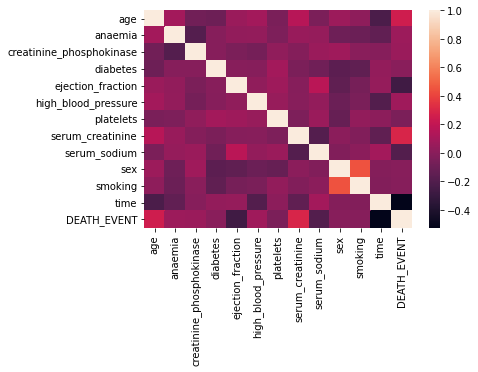

In [ ]:
numeric_features = [t[0] for t in cardiaco_data.dtypes if t[1] !='string']
numeric_features_df = cardiaco_data.select(numeric_features)
numeric_features_df.toPandas().head()
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])
#Matriz de correlacion con coeficiente de pearson
#Para poder hacer comparaciones se estandariza la covarianza, generando
corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
#Mostrar mapa de calor que es una técnica de visualización de datos
sns.heatmap(corr_df);

In [ ]:
#Mostrar el dataframe con las etiquetas numericas
cardiaco_data2 = cardiaco_data.rdd.map(lambda x: tuple(x))

#Generar la tupla de etiqueta(Key) y caracteristicas de data(features)
#Iris_data2 = Iris_data2.map(lambda x: (x[6], list( set( (x[1], x[2], x[3], x[4]) ) ) ))
RDD_cardiaco_data2 = cardiaco_data2.map(lambda x: (x[12],  (x[0],x[1], x[2], x[3], x[4],x[5], x[6], x[7],x[8],x[9],x[10],x[11])))
RDD_cardiaco_data2.collect()

[(1.0,
  (0.6363636363636364,
   0.0,
   0.07131921408522582,
   0.0,
   0.09090909090909091,
   1.0,
   0.2908231300763729,
   0.15730337078651685,
   0.4857142857142857,
   1.0,
   0.0,
   0.0)),
 (1.0,
  (0.2727272727272727,
   0.0,
   1.0,
   0.0,
   0.36363636363636365,
   0.0,
   0.2888326221360165,
   0.06741573033707866,
   0.6571428571428571,
   1.0,
   0.0,
   0.0071174377224199285)),
 (1.0,
  (0.45454545454545453,
   0.0,
   0.015692778770094413,
   0.0,
   0.09090909090909091,
   0.0,
   0.1659595102436659,
   0.0898876404494382,
   0.45714285714285713,
   1.0,
   1.0,
   0.010676156583629894)),
 (1.0,
  (0.18181818181818182,
   1.0,
   0.011227353916815515,
   0.0,
   0.09090909090909091,
   0.0,
   0.22414838162201478,
   0.15730337078651685,
   0.6857142857142857,
   1.0,
   0.0,
   0.010676156583629894)),
 (1.0,
  (0.45454545454545453,
   1.0,
   0.01747894871140597,
   1.0,
   0.09090909090909091,
   0.0,
   0.36598375560674024,
   0.24719101123595508,
   0.08571428571

In [ ]:
train_sample = 0.80
test_sample = 0.20

(train_cardiaco, test_cardiaco) = RDD_cardiaco_data2.randomSplit([train_sample, test_sample], 1234)

In [ ]:
print('Datos para entrenamiento:',train_cardiaco.count(), '\nDatos para test:', test_cardiaco.count())

Datos para entrenamiento: 241 
Datos para test: 58


In [ ]:
model2 = perceptron()
#fit(train, pesos, 5, 0.01,'step')
#Pesos ideales - IRIS:  [0.8162567977208124, 0.4037439312991393, 0.7589376519521082, 0.39778513745243127] 
model2.fit(train_cardiaco, epochs=5, learning_rate=0.01, kernel_function='step')

Pesos iniciales:  [0.021729230853624548, 0.2127131711371142, 0.06487447914441324, 0.06582858864151275, 0.8057430918816324, 0.3128017783504353, 0.8896662590180756, 0.7682154499897479, 0.05132831836793583, 0.07861607241626012, 0.7618643476407437, 0.6158909990504059] 

Epoca:  1 	
[==================================================] 100.0%
Nuevos pesos hallados:  [-0.29360488181818184, -0.1272868, 0.013293580428680786, -0.2541714, 0.3924098303030303, -0.0571982, 0.579996020099406, 0.6929347449438202, -0.6092428285714285, -0.4413839, 0.3718643, 0.2026528] 

Epoca:  2 	
[==================================================] 100.0%
Nuevos pesos hallados:  [-0.20511998181818183, -0.0372868, 0.036023880428680786, -0.1441714, 0.2948342303030303, -0.0271982, 0.551417020099406, 0.7028001449438203, -0.5826714285714285, -0.3013839, 0.2318643, 0.1054644] 

Epoca:  3 	
[==================================================] 100.0%
Nuevos pesos hallados:  [-0.11699888181818181, -0.0072868, 0.06550618042868

In [ ]:
model2.evaluate_training(train_cardiaco)

Acertadas correctamente:  167
Total de datos:  241
Precision:  0.6929460580912863


In [ ]:
model2.evaluate_training(test_cardiaco)

Acertadas correctamente:  43
Total de datos:  58
Precision:  0.7413793103448276


In [ ]:
#extraer datos de la posicion i
i=30
test_cardiaco.take(i)[i-1]

(0.0,
 (0.38181818181818183,
  1.0,
  0.007782597601428936,
  0.0,
  0.3939393939393939,
  1.0,
  0.24718147654261122,
  0.0449438202247191,
  0.8,
  0.0,
  0.0,
  0.37722419928825623))

In [ ]:
model2.predecir_manual([0.38181818181818183,
  1.0,
  0.007782597601428936,
  0.0,
  0.3939393939393939,
  1.0,
  0.24718147654261122,
  0.0449438202247191,
  0.8,
  0.0,
  0.0,
  0.37722419928825623])

0